# Puntos criticos de funciones de 2 o mas variables

In [1]:
from sympy import *

In [7]:
x, y = symbols('x y')
f = Function('f')(x, y)
f

f(x, y)

## Obtener los puntos criticos de la siguinete funcion

In [46]:
expresion = x**2 - 2*x + (y**2)/4
Eq(f, expresion)

Eq(f(x, y), x**2 - 2*x + y**2/4)

### Se obtinen las derivadas parciales para encontrar los puntos criticos

In [47]:
# Derivada paricial con repecto de x
u_x = f.diff(x)
x_derivada = diff(expresion, x)

Eq(u_x, x_derivada)

Eq(Derivative(f(x, y), x), 2*x - 2)

In [48]:
# Derivada paricial con repecto de y
u_y = f.diff(y)
y_derivada = diff(expresion, y)

Eq(u_y, y_derivada)

Eq(Derivative(f(x, y), y), y/2)

### Se obtienen los puntos criticos igualando la derivada a 0

In [49]:
x_p_Eq = Eq(x_derivada, 0)
display(x_p_Eq)
x_punto_critico = solve(x_p_Eq)[0]
display(Eq(x ,x_punto_critico))

Eq(2*x - 2, 0)

Eq(x, 1)

In [50]:
y_p_Eq = Eq(y_derivada, 0)
display(y_p_Eq)
y_punto_critico = solve(y_p_Eq)[0]
display(Eq(y, y_punto_critico))

Eq(y/2, 0)

Eq(y, 0)

In [51]:
punto_critico = (x_punto_critico, y_punto_critico)
display(punto_critico)

(1, 0)

## Para clasificar el punto critico se hace uso del determinante de la  Matriz Hessiana

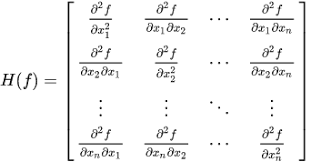

In [53]:
from IPython.display import Image
display(Image("img/matriz_hessiana.png"))

D es el determinante de la matriz hessiana

## Criterios de clasificacion
- Si D > 0 y fxx(a, b) < 0, entonces f(a, b) es un valor maximo local
- Si D > 0 y fxx(a, b) > 0, entonces f(a, b) es un valor minimo local
- Si D < 0, entonces f(a, b) es un punto de silla
- Si D = 0 el criterio no es concluyente

In [57]:
def matriz_hessiana(expresion, simbolos):
    """
        Recibe la expresion y los simbolos de sympy con los que va a construir la matriz

        Devuleve una Matriz hessiana
    """

    X = Matrix([s for s in simbolos])
    f = Matrix([expresion])

    return sympify(hessian(f, X))

In [62]:
m_hessiana = matriz_hessiana(expresion, (x, y))
m_hessiana

Matrix([
[2,   0],
[0, 1/2]])

In [63]:
D = m_hessiana.det()
D

1

In [69]:
fxx = diff(x_derivada)
fxx

2

In [70]:
def clasificar_puntos(puntos: list, D: numer, fxx):
    for punto in puntos:
        if D == 0:
            print(punto, 'no es concluyente.')
        elif D < 0:
            print(punto, 'es un punto de silla')
        elif D > 0:
            if fxx.evalf(subs=punto) < 0:
                print(punto, 'es un punto maximo local')
            else:
                print(punto, 'es un punto minimo local')
            

In [72]:
clasificar_puntos([{x: punto_critico[0], y: punto_critico[1]}], D, fxx)

{x: 1, y: 0} es un punto minimo local
